**Assignment**: 3-class Sentiment Analysis with LSTM on Twitter Data
 

**Objective**:
The objective of this assignment is to train a LSTM neural network to perform 3-class sentiment analysis on Twitter data.
 

**Dataset**:
The dataset used in this assignment is the Sentiment140 dataset, which can be downloaded from http://help.sentiment140.com/for-students. The dataset consists of 1.6 million tweets, labeled as positive (4), neutral (2), or negative (0)

## reading the training and test datas

In [2]:
import pandas as pd
import numpy as np
df1=pd.read_csv(r"/content/1.tsv",sep='\t',names=["id","tweet_no","sentiment","tweet"])
df1=df1.drop(['id'],axis=1)
df1

,tweet_no,sentiment,tweet
0,LJ111111,negative,"I know I missed something here , but what does..."
1,LJ111113,neutral,What do you think of Beside Ourselves as a tit...
2,LJ111114,positive,:D I intend to be one someday .
3,LJ111117,negative,LLLINKKK LLLINKKK IIIMAGEEELLLINKKK The choice...
4,LJ111119,neutral,LLLINKKK Some more mountains .
...,...,...,...
1137,LJ113616,positive,Maybe it was - his - fantasy ?
1138,LJ113618,negative,"It was ok , but they always just seem so nervo..."
1139,LJ113621,positive,It is streamable from YepRoc -- matter of fact...
1140,LJ113623,positive,"comment telling me who you are , or how you fo..."


In [3]:
actual_test=pd.read_csv("/content/testdata.manual.2009.06.14.csv",names=["sentiment","id","date","device","user","tweet"])
actual_test=actual_test.drop(["id","date","user","device"],axis=1)
actual_test["sentiment"]=actual_test["sentiment"]/2
actual_test["sentiment"]= actual_test['sentiment'].astype(int)
actual_test

,sentiment,tweet
0,2,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,2,Reading my kindle2... Love it... Lee childs i...
2,2,"Ok, first assesment of the #kindle2 ...it fuck..."
3,2,@kenburbary You'll love your Kindle2. I've had...
4,2,@mikefish Fair enough. But i have the Kindle2...
...,...,...
493,1,Ask Programming: LaTeX or InDesign?: submitted...
494,0,"On that note, I hate Word. I hate Pages. I hat..."
495,2,Ahhh... back in a *real* text editing environm...
496,0,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [4]:
import pandas as pd
df2=pd.read_csv(r"/content/2.tsv",sep='\t',names=["id","tweet_no","sentiment","tweet"])
df2=df2.drop(['id'],axis=1)
df2

,tweet_no,sentiment,tweet
0,111110,neutral,Yes i am going from school have class till 5 c...
1,111111,neutral,can u tape the match for me? i\u2019ll rush o...
2,111112,neutral,Too many people at my house my relatives are h...
3,111115,negative,Yea I have spoken to him liao. Indeed he is up...
4,111117,positive,Haha... I want to see. E macdonalds here cheap...
...,...,...,...
2089,114550,negative,Oki... Think i\u2019m confused... I only know ...
2090,114554,neutral,Yup... Ok i go home look at the timings then i...
2091,114556,neutral,Here got lots of hair dresser fr china.
2092,114557,neutral,no alh we are not discussing fromt he viewpoi...


In [5]:
df=pd.concat([df1,df2])
df

,tweet_no,sentiment,tweet
0,LJ111111,negative,"I know I missed something here , but what does..."
1,LJ111113,neutral,What do you think of Beside Ourselves as a tit...
2,LJ111114,positive,:D I intend to be one someday .
3,LJ111117,negative,LLLINKKK LLLINKKK IIIMAGEEELLLINKKK The choice...
4,LJ111119,neutral,LLLINKKK Some more mountains .
...,...,...,...
2089,114550,negative,Oki... Think i\u2019m confused... I only know ...
2090,114554,neutral,Yup... Ok i go home look at the timings then i...
2091,114556,neutral,Here got lots of hair dresser fr china.
2092,114557,neutral,no alh we are not discussing fromt he viewpoi...


In [6]:
for i in range(3,14):
    df3=pd.read_csv(f"/content/{i}.txt",sep="\t",names=["tweet_no","sentiment","tweet","null"])
    df3=df3[["tweet_no","sentiment","tweet"]]
    df=pd.concat([df,df3])
df    

,tweet_no,sentiment,tweet
0,LJ111111,negative,"I know I missed something here , but what does..."
1,LJ111113,neutral,What do you think of Beside Ourselves as a tit...
2,LJ111114,positive,:D I intend to be one someday .
3,LJ111117,negative,LLLINKKK LLLINKKK IIIMAGEEELLLINKKK The choice...
4,LJ111119,neutral,LLLINKKK Some more mountains .
...,...,...,...
5863,639855845958885376,positive,@Racalto_SK ok good to know. Punting at MetLif...
5864,639979760735662080,neutral,everyone who sat around me at metlife was so a...
5865,640196838260363269,neutral,what giants or niners fans would wanna go to t...
5866,640975710354567168,positive,Anybody want a ticket for tomorrow Colombia vs...


In [7]:
df.loc[df['sentiment']=='negative', 'sentiment']=0
df.loc[df['sentiment']=='positive', 'sentiment']=2   
df.loc[df['sentiment']=='neutral', 'sentiment']=1 
df

,tweet_no,sentiment,tweet
0,LJ111111,0,"I know I missed something here , but what does..."
1,LJ111113,1,What do you think of Beside Ourselves as a tit...
2,LJ111114,2,:D I intend to be one someday .
3,LJ111117,0,LLLINKKK LLLINKKK IIIMAGEEELLLINKKK The choice...
4,LJ111119,1,LLLINKKK Some more mountains .
...,...,...,...
5863,639855845958885376,2,@Racalto_SK ok good to know. Punting at MetLif...
5864,639979760735662080,1,everyone who sat around me at metlife was so a...
5865,640196838260363269,1,what giants or niners fans would wanna go to t...
5866,640975710354567168,2,Anybody want a ticket for tomorrow Colombia vs...


## checking null values

In [8]:
df.isna().sum()

tweet_no     0
sentiment    0
tweet        0
dtype: int64

In [9]:
actual_test.isna().sum()

sentiment    0
tweet        0
dtype: int64

## dropping unwanted columns

In [10]:
df.dropna(axis=0,inplace=True)
df

,tweet_no,sentiment,tweet
0,LJ111111,0,"I know I missed something here , but what does..."
1,LJ111113,1,What do you think of Beside Ourselves as a tit...
2,LJ111114,2,:D I intend to be one someday .
3,LJ111117,0,LLLINKKK LLLINKKK IIIMAGEEELLLINKKK The choice...
4,LJ111119,1,LLLINKKK Some more mountains .
...,...,...,...
5863,639855845958885376,2,@Racalto_SK ok good to know. Punting at MetLif...
5864,639979760735662080,1,everyone who sat around me at metlife was so a...
5865,640196838260363269,1,what giants or niners fans would wanna go to t...
5866,640975710354567168,2,Anybody want a ticket for tomorrow Colombia vs...


In [11]:
df['tweet']=df['tweet'].str.lower()

In [12]:
actual_test["tweet"]=actual_test['tweet'].str.lower()

In [13]:
actual_test

,sentiment,tweet
0,2,@stellargirl i loooooooovvvvvveee my kindle2. ...
1,2,reading my kindle2... love it... lee childs i...
2,2,"ok, first assesment of the #kindle2 ...it fuck..."
3,2,@kenburbary you'll love your kindle2. i've had...
4,2,@mikefish fair enough. but i have the kindle2...
...,...,...
493,1,ask programming: latex or indesign?: submitted...
494,0,"on that note, i hate word. i hate pages. i hat..."
495,2,ahhh... back in a *real* text editing environm...
496,0,"trouble in iran, i see. hmm. iran. iran so far..."


In [14]:
df

,tweet_no,sentiment,tweet
0,LJ111111,0,"i know i missed something here , but what does..."
1,LJ111113,1,what do you think of beside ourselves as a tit...
2,LJ111114,2,:d i intend to be one someday .
3,LJ111117,0,lllinkkk lllinkkk iiimageeelllinkkk the choice...
4,LJ111119,1,lllinkkk some more mountains .
...,...,...,...
5863,639855845958885376,2,@racalto_sk ok good to know. punting at metlif...
5864,639979760735662080,1,everyone who sat around me at metlife was so a...
5865,640196838260363269,1,what giants or niners fans would wanna go to t...
5866,640975710354567168,2,anybody want a ticket for tomorrow colombia vs...


## removing punctuations

In [15]:
import string
df['tweet'] = df['tweet'].str.replace('[{}]'.format(string.punctuation), '')
df

<ipython-input-15-15a477a267d6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace('[{}]'.format(string.punctuation), '')


,tweet_no,sentiment,tweet
0,LJ111111,0,i know i missed something here but what does ...
1,LJ111113,1,what do you think of beside ourselves as a title
2,LJ111114,2,d i intend to be one someday
3,LJ111117,0,lllinkkk lllinkkk iiimageeelllinkkk the choice...
4,LJ111119,1,lllinkkk some more mountains
...,...,...,...
5863,639855845958885376,2,racaltosk ok good to know punting at metlife i...
5864,639979760735662080,1,everyone who sat around me at metlife was so a...
5865,640196838260363269,1,what giants or niners fans would wanna go to t...
5866,640975710354567168,2,anybody want a ticket for tomorrow colombia vs...


In [16]:
actual_test['tweet'] = actual_test['tweet'].str.replace('[{}]'.format(string.punctuation), '')
actual_test

<ipython-input-16-221a4831bf78>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  actual_test['tweet'] = actual_test['tweet'].str.replace('[{}]'.format(string.punctuation), '')


,sentiment,tweet
0,2,stellargirl i loooooooovvvvvveee my kindle2 no...
1,2,reading my kindle2 love it lee childs is good...
2,2,ok first assesment of the kindle2 it fucking r...
3,2,kenburbary youll love your kindle2 ive had min...
4,2,mikefish fair enough but i have the kindle2 a...
...,...,...
493,1,ask programming latex or indesign submitted by...
494,0,on that note i hate word i hate pages i hate l...
495,2,ahhh back in a real text editing environment i...
496,0,trouble in iran i see hmm iran iran so far awa...


## tokenizing

In [17]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
df['tokenized_column'] = df['tweet'].apply(nltk.word_tokenize)
df

,tweet_no,sentiment,tweet,tokenized_column
0,LJ111111,0,i know i missed something here but what does ...,"[i, know, i, missed, something, here, but, wha..."
1,LJ111113,1,what do you think of beside ourselves as a title,"[what, do, you, think, of, beside, ourselves, ..."
2,LJ111114,2,d i intend to be one someday,"[d, i, intend, to, be, one, someday]"
3,LJ111117,0,lllinkkk lllinkkk iiimageeelllinkkk the choice...,"[lllinkkk, lllinkkk, iiimageeelllinkkk, the, c..."
4,LJ111119,1,lllinkkk some more mountains,"[lllinkkk, some, more, mountains]"
...,...,...,...,...
5863,639855845958885376,2,racaltosk ok good to know punting at metlife i...,"[racaltosk, ok, good, to, know, punting, at, m..."
5864,639979760735662080,1,everyone who sat around me at metlife was so a...,"[everyone, who, sat, around, me, at, metlife, ..."
5865,640196838260363269,1,what giants or niners fans would wanna go to t...,"[what, giants, or, niners, fans, would, wan, n..."
5866,640975710354567168,2,anybody want a ticket for tomorrow colombia vs...,"[anybody, want, a, ticket, for, tomorrow, colo..."


In [19]:
actual_test['tokenized_column'] = actual_test['tweet'].apply(nltk.word_tokenize)
actual_test

,sentiment,tweet,tokenized_column
0,2,stellargirl i loooooooovvvvvveee my kindle2 no...,"[stellargirl, i, loooooooovvvvvveee, my, kindl..."
1,2,reading my kindle2 love it lee childs is good...,"[reading, my, kindle2, love, it, lee, childs, ..."
2,2,ok first assesment of the kindle2 it fucking r...,"[ok, first, assesment, of, the, kindle2, it, f..."
3,2,kenburbary youll love your kindle2 ive had min...,"[kenburbary, youll, love, your, kindle2, ive, ..."
4,2,mikefish fair enough but i have the kindle2 a...,"[mikefish, fair, enough, but, i, have, the, ki..."
...,...,...,...
493,1,ask programming latex or indesign submitted by...,"[ask, programming, latex, or, indesign, submit..."
494,0,on that note i hate word i hate pages i hate l...,"[on, that, note, i, hate, word, i, hate, pages..."
495,2,ahhh back in a real text editing environment i...,"[ahhh, back, in, a, real, text, editing, envir..."
496,0,trouble in iran i see hmm iran iran so far awa...,"[trouble, in, iran, i, see, hmm, iran, iran, s..."


## removing stopwords

In [20]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
stop_words= set(stopwords.words('english'))

df['filtered_text'] = df['tweet'].apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word.lower() not in stop_words]))
df

,tweet_no,sentiment,tweet,tokenized_column,filtered_text
0,LJ111111,0,i know i missed something here but what does ...,"[i, know, i, missed, something, here, but, wha...",know missed something thud mean
1,LJ111113,1,what do you think of beside ourselves as a title,"[what, do, you, think, of, beside, ourselves, ...",think beside title
2,LJ111114,2,d i intend to be one someday,"[d, i, intend, to, be, one, someday]",intend one someday
3,LJ111117,0,lllinkkk lllinkkk iiimageeelllinkkk the choice...,"[lllinkkk, lllinkkk, iiimageeelllinkkk, the, c...",lllinkkk lllinkkk iiimageeelllinkkk choice tak...
4,LJ111119,1,lllinkkk some more mountains,"[lllinkkk, some, more, mountains]",lllinkkk mountains
...,...,...,...,...,...
5863,639855845958885376,2,racaltosk ok good to know punting at metlife i...,"[racaltosk, ok, good, to, know, punting, at, m...",racaltosk ok good know punting metlife decembe...
5864,639979760735662080,1,everyone who sat around me at metlife was so a...,"[everyone, who, sat, around, me, at, metlife, ...",everyone sat around metlife annoying didnt let...
5865,640196838260363269,1,what giants or niners fans would wanna go to t...,"[what, giants, or, niners, fans, would, wan, n...",giants niners fans would wan na go sunday nigh...
5866,640975710354567168,2,anybody want a ticket for tomorrow colombia vs...,"[anybody, want, a, ticket, for, tomorrow, colo...",anybody want ticket tomorrow colombia vs peru ...


In [22]:

actual_test['filtered_text'] = actual_test['tweet'].apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word.lower() not in stop_words]))
actual_test

,sentiment,tweet,tokenized_column,filtered_text
0,2,stellargirl i loooooooovvvvvveee my kindle2 no...,"[stellargirl, i, loooooooovvvvvveee, my, kindl...",stellargirl loooooooovvvvvveee kindle2 dx cool...
1,2,reading my kindle2 love it lee childs is good...,"[reading, my, kindle2, love, it, lee, childs, ...",reading kindle2 love lee childs good read
2,2,ok first assesment of the kindle2 it fucking r...,"[ok, first, assesment, of, the, kindle2, it, f...",ok first assesment kindle2 fucking rocks
3,2,kenburbary youll love your kindle2 ive had min...,"[kenburbary, youll, love, your, kindle2, ive, ...",kenburbary youll love kindle2 ive mine months ...
4,2,mikefish fair enough but i have the kindle2 a...,"[mikefish, fair, enough, but, i, have, the, ki...",mikefish fair enough kindle2 think perfect
...,...,...,...,...
493,1,ask programming latex or indesign submitted by...,"[ask, programming, latex, or, indesign, submit...",ask programming latex indesign submitted calci...
494,0,on that note i hate word i hate pages i hate l...,"[on, that, note, i, hate, word, i, hate, pages...",note hate word hate pages hate latex said hate...
495,2,ahhh back in a real text editing environment i...,"[ahhh, back, in, a, real, text, editing, envir...",ahhh back real text editing environment lt3 latex
496,0,trouble in iran i see hmm iran iran so far awa...,"[trouble, in, iran, i, see, hmm, iran, iran, s...",trouble iran see hmm iran iran far away flocko...


## stemming the tweets

In [23]:
from nltk.stem import PorterStemmer
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
stemmer = PorterStemmer()
df['stemmed_tweet'] = df['tweet'].apply(lambda x: " ".join([stemmer.stem(word) for word in nltk.word_tokenize(x)]))

In [25]:
df

,tweet_no,sentiment,tweet,tokenized_column,filtered_text,stemmed_tweet
0,LJ111111,0,i know i missed something here but what does ...,"[i, know, i, missed, something, here, but, wha...",know missed something thud mean,i know i miss someth here but what doe thud mean
1,LJ111113,1,what do you think of beside ourselves as a title,"[what, do, you, think, of, beside, ourselves, ...",think beside title,what do you think of besid ourselv as a titl
2,LJ111114,2,d i intend to be one someday,"[d, i, intend, to, be, one, someday]",intend one someday,d i intend to be one someday
3,LJ111117,0,lllinkkk lllinkkk iiimageeelllinkkk the choice...,"[lllinkkk, lllinkkk, iiimageeelllinkkk, the, c...",lllinkkk lllinkkk iiimageeelllinkkk choice tak...,lllinkkk lllinkkk iiimageeelllinkkk the choic ...
4,LJ111119,1,lllinkkk some more mountains,"[lllinkkk, some, more, mountains]",lllinkkk mountains,lllinkkk some more mountain
...,...,...,...,...,...,...
5863,639855845958885376,2,racaltosk ok good to know punting at metlife i...,"[racaltosk, ok, good, to, know, punting, at, m...",racaltosk ok good know punting metlife decembe...,racaltosk ok good to know punt at metlif in de...
5864,639979760735662080,1,everyone who sat around me at metlife was so a...,"[everyone, who, sat, around, me, at, metlife, ...",everyone sat around metlife annoying didnt let...,everyon who sat around me at metlif wa so anno...
5865,640196838260363269,1,what giants or niners fans would wanna go to t...,"[what, giants, or, niners, fans, would, wan, n...",giants niners fans would wan na go sunday nigh...,what giant or niner fan would wan na go to the...
5866,640975710354567168,2,anybody want a ticket for tomorrow colombia vs...,"[anybody, want, a, ticket, for, tomorrow, colo...",anybody want ticket tomorrow colombia vs peru ...,anybodi want a ticket for tomorrow colombia vs...


In [26]:
actual_test['stemmed_tweet'] = actual_test['tweet'].apply(lambda x: " ".join([stemmer.stem(word) for word in nltk.word_tokenize(x)]))
actual_test

,sentiment,tweet,tokenized_column,filtered_text,stemmed_tweet
0,2,stellargirl i loooooooovvvvvveee my kindle2 no...,"[stellargirl, i, loooooooovvvvvveee, my, kindl...",stellargirl loooooooovvvvvveee kindle2 dx cool...,stellargirl i loooooooovvvvvvee my kindle2 not...
1,2,reading my kindle2 love it lee childs is good...,"[reading, my, kindle2, love, it, lee, childs, ...",reading kindle2 love lee childs good read,read my kindle2 love it lee child is good read
2,2,ok first assesment of the kindle2 it fucking r...,"[ok, first, assesment, of, the, kindle2, it, f...",ok first assesment kindle2 fucking rocks,ok first asses of the kindle2 it fuck rock
3,2,kenburbary youll love your kindle2 ive had min...,"[kenburbary, youll, love, your, kindle2, ive, ...",kenburbary youll love kindle2 ive mine months ...,kenburbari youll love your kindle2 ive had min...
4,2,mikefish fair enough but i have the kindle2 a...,"[mikefish, fair, enough, but, i, have, the, ki...",mikefish fair enough kindle2 think perfect,mikefish fair enough but i have the kindle2 an...
...,...,...,...,...,...
493,1,ask programming latex or indesign submitted by...,"[ask, programming, latex, or, indesign, submit...",ask programming latex indesign submitted calci...,ask program latex or indesign submit by calcio...
494,0,on that note i hate word i hate pages i hate l...,"[on, that, note, i, hate, word, i, hate, pages...",note hate word hate pages hate latex said hate...,on that note i hate word i hate page i hate la...
495,2,ahhh back in a real text editing environment i...,"[ahhh, back, in, a, real, text, editing, envir...",ahhh back real text editing environment lt3 latex,ahhh back in a real text edit environ i lt3 latex
496,0,trouble in iran i see hmm iran iran so far awa...,"[trouble, in, iran, i, see, hmm, iran, iran, s...",trouble iran see hmm iran iran far away flocko...,troubl in iran i see hmm iran iran so far away...


## declaring X, Y, X_test(which is X val), Y_test(which is Y val), X_actual_tets, Y_actual_tets

In [51]:
X=df['stemmed_tweet']
Y=df['sentiment']

In [52]:
X_test_actual=actual_test['stemmed_tweet']
Y_test_actual=actual_test['sentiment']

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [54]:
temp=X_test
temp


27       whi sad i mean wat he tell u he got grumbl abt...
166      look move over blood moon here the pumpkin sun...
1185     1st point to sunnybank in premier rugbi grand ...
4635     carli fiorina on fox news sunday pick up where...
1184     q3 054 eli man pass intend for victor cruz int...
                               ...                        
967                 but i figur i can alway rent it on dvd
14837    thi red sox team thi one start over in may the...
733      amaz day got 4th place in the dalla urban beer...
747           but whatev i still love you frake bblllinkkk
1615     the 500 ticket for jonathan kozol are go fast ...
Name: stemmed_tweet, Length: 10674, dtype: object

In [56]:
temp_test=X_test_actual

In [58]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=1000)

In [59]:
tokenizer.fit_on_texts(X_train.tolist())
sequences = tokenizer.texts_to_sequences(X_train.tolist())

In [60]:
sequences2 = tokenizer.texts_to_sequences(X_test.tolist())

In [61]:
sequences_test=tokenizer.texts_to_sequences(X_test_actual.tolist())

In [62]:
len(tokenizer.word_index)

62367

In [149]:
X_train=sequences

In [150]:
X_test=sequences2


In [65]:
X_test_actual=sequences_test

## padding

In [66]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(X_train,maxlen=15)
padded_sequences.shape

(42694, 15)

In [67]:
Y_train.shape

(42694,)

In [68]:
padded_sequences2 = pad_sequences(X_test,maxlen=15)
padded_sequences2.shape

(10674, 15)

In [69]:
Y_test.shape

(10674,)

In [70]:
padded_sequences_test = pad_sequences(X_test_actual,maxlen=15)
padded_sequences_test.shape

(498, 15)

In [71]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM,Input,Dropout,GRU

## Using LSTM

In [72]:
model=Sequential()

model.add(Embedding(len(tokenizer.word_index)+1,64,input_length=15))

model.add(LSTM(128,activation='relu',return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu',return_sequences=False))

model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(4,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 64)            3991552   
                                                                 
 lstm (LSTM)                 (None, 15, 128)           98816     
                                                                 
 dropout (Dropout)           (None, 15, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)               

In [74]:
padded_sequences = np.array(padded_sequences).astype('float32')
padded_sequences2 = np.array(padded_sequences2).astype('float32')
Y_train = np.array(Y_train).astype('float32')
Y_test = np.array(Y_test).astype('float32')
history1=model.fit(padded_sequences,Y_train,validation_data=(pd.DataFrame(padded_sequences2),pd.DataFrame(Y_test)), epochs=10,batch_size=64)

Epoch 1/10
668/668 [==============================] - 60s 88ms/step - loss: 0.9456 - accuracy: 0.5271 - val_loss: 0.8320 - val_accuracy: 0.6112
Epoch 2/10
668/668 [==============================] - 55s 83ms/step - loss: 0.8279 - accuracy: 0.6174 - val_loss: 0.8135 - val_accuracy: 0.6257
Epoch 3/10
668/668 [==============================] - 58s 86ms/step - loss: 0.8052 - accuracy: 0.6294 - val_loss: 0.8055 - val_accuracy: 0.6298
Epoch 4/10
668/668 [==============================] - 50s 75ms/step - loss: 0.7935 - accuracy: 0.6355 - val_loss: 0.8379 - val_accuracy: 0.6226
Epoch 5/10
668/668 [==============================] - 58s 87ms/step - loss: 0.7859 - accuracy: 0.6413 - val_loss: 0.7981 - val_accuracy: 0.6298
Epoch 6/10
668/668 [==============================] - 48s 72ms/step - loss: 0.7719 - accuracy: 0.6478 - val_loss: 0.8139 - val_accuracy: 0.6135
Epoch 7/10
668/668 [==============================] - 53s 79ms/step - loss: 0.7603 - accuracy: 0.6544 - val_loss: 0.8151 - val_accuracy:

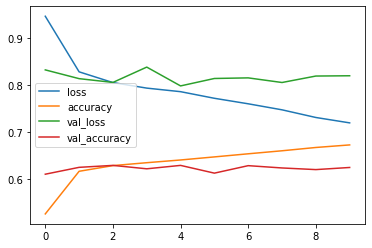

In [144]:
pd.DataFrame(history1.history).plot()

In [79]:
Y_pred=model.predict(padded_sequences_test, verbose=1,batch_size=64)
Y_pred=np.argmax(Y_pred, axis=-1)
from sklearn.metrics import  classification_report
print(classification_report(Y_test_actual,Y_pred))


8/8 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.86      0.37      0.52       177
           1       0.49      0.83      0.62       139
           2       0.68      0.70      0.69       182

    accuracy                           0.62       498
   macro avg       0.68      0.63      0.61       498
weighted avg       0.69      0.62      0.61       498



## Using GRU

In [80]:
model2=Sequential()

model2.add(Embedding(len(tokenizer.word_index)+1,64,input_length=15))

model2.add(GRU(128, activation='relu', return_sequences=True))

model2.add(Dropout(0.2))

model2.add(GRU(128, activation='relu', return_sequences=False))

model2.add(Dropout(0.2))

model2.add(Dense(32, activation='relu'))

model2.add(Dropout(0.2))

model2.add(Dense(4, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 15, 64)            3991552   
                                                                 
 gru_2 (GRU)                 (None, 15, 128)           74496     
                                                                 
 dropout_6 (Dropout)         (None, 15, 128)           0         
                                                                 
 gru_3 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dropout_8 (Dropout)         (None, 32)               

In [82]:
Y_train = np.array(Y_train).astype('float32')
Y_test = np.array(Y_test).astype('float32')
history2=model2.fit(padded_sequences,Y_train,validation_data=(pd.DataFrame(padded_sequences2),pd.DataFrame(Y_test)), epochs=10,batch_size=64)

Epoch 1/10
668/668 [==============================] - 79s 115ms/step - loss: 0.9237 - accuracy: 0.5503 - val_loss: 0.8229 - val_accuracy: 0.6169
Epoch 2/10
668/668 [==============================] - 79s 118ms/step - loss: 0.8166 - accuracy: 0.6251 - val_loss: 0.8109 - val_accuracy: 0.6246
Epoch 3/10
668/668 [==============================] - 66s 98ms/step - loss: 0.8010 - accuracy: 0.6328 - val_loss: 0.8016 - val_accuracy: 0.6299
Epoch 4/10
668/668 [==============================] - 63s 94ms/step - loss: 0.7905 - accuracy: 0.6383 - val_loss: 0.7996 - val_accuracy: 0.6333
Epoch 5/10
668/668 [==============================] - 63s 95ms/step - loss: 0.7796 - accuracy: 0.6437 - val_loss: 0.7996 - val_accuracy: 0.6286
Epoch 6/10
668/668 [==============================] - 62s 92ms/step - loss: 0.7682 - accuracy: 0.6490 - val_loss: 0.8014 - val_accuracy: 0.6319
Epoch 7/10
668/668 [==============================] - 62s 92ms/step - loss: 0.7588 - accuracy: 0.6556 - val_loss: 0.8106 - val_accurac

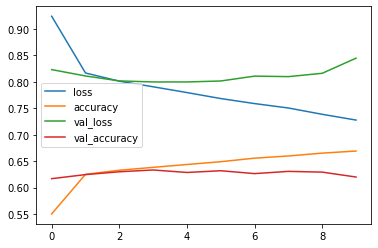

In [145]:
pd.DataFrame(history2.history).plot()

In [97]:
Y_pred2=model2.predict(padded_sequences_test, verbose=1,batch_size=64)
Y_pred2=np.argmax(Y_pred2, axis=-1)
from sklearn.metrics import  classification_report
print(classification_report(Y_test_actual,Y_pred2))


8/8 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.80      0.34      0.48       177
           1       0.51      0.84      0.64       139
           2       0.70      0.75      0.72       182

    accuracy                           0.63       498
   macro avg       0.67      0.64      0.61       498
weighted avg       0.68      0.63      0.61       498



## Using Bidrectional LSTM

In [98]:
from keras import models, layers
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
import numpy as np
model3 = Sequential()
model3.add(layers.Embedding(len(tokenizer.word_index)+1, 40, input_length=15))
model3.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model3.add(layers.Dense(3,activation='softmax'))
model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 15, 40)            2494720   
                                                                 
 bidirectional (Bidirectiona  (None, 40)               9760      
 l)                                                              
                                                                 
 dense_8 (Dense)             (None, 3)                 123       
                                                                 
Total params: 2,504,603
Trainable params: 2,504,603
Non-trainable params: 0
_________________________________________________________________


In [99]:
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)

In [100]:

history3 = model3.fit(padded_sequences, Y_train, epochs=10, validation_data=(padded_sequences2, Y_test), callbacks=[checkpoint2])


Epoch 1/10
1329/1335 [============================>.] - ETA: 0s - loss: 0.8780 - accuracy: 0.5749
Epoch 1: val_accuracy improved from -inf to 0.61889, saving model to best_model2.hdf5
1335/1335 [==============================] - 18s 9ms/step - loss: 0.8778 - accuracy: 0.5750 - val_loss: 0.8164 - val_accuracy: 0.6189
Epoch 2/10
1333/1335 [============================>.] - ETA: 0s - loss: 0.8118 - accuracy: 0.6236
Epoch 2: val_accuracy improved from 0.61889 to 0.62020, saving model to best_model2.hdf5
1335/1335 [==============================] - 11s 8ms/step - loss: 0.8118 - accuracy: 0.6236 - val_loss: 0.8094 - val_accuracy: 0.6202
Epoch 3/10
1330/1335 [============================>.] - ETA: 0s - loss: 0.7977 - accuracy: 0.6305
Epoch 3: val_accuracy improved from 0.62020 to 0.62769, saving model to best_model2.hdf5
1335/1335 [==============================] - 11s 8ms/step - loss: 0.7974 - accuracy: 0.6307 - val_loss: 0.8052 - val_accuracy: 0.6277
Epoch 4/10
1333/1335 [==================

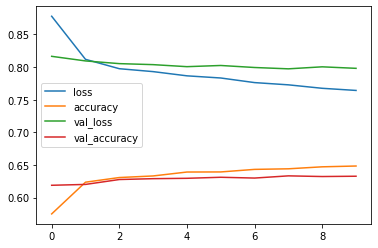

In [146]:
pd.DataFrame(history3.history).plot()

In [101]:
Y_pred3=model3.predict(padded_sequences_test, verbose=1,batch_size=64)
Y_pred3=np.argmax(Y_pred3, axis=-1)
from sklearn.metrics import  classification_report
print(classification_report(Y_test_actual,Y_pred3))


8/8 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.90      0.34      0.50       177
           1       0.49      0.90      0.63       139
           2       0.71      0.68      0.70       182

    accuracy                           0.62       498
   macro avg       0.70      0.64      0.61       498
weighted avg       0.72      0.62      0.61       498



## Using Universal Sentence Encoder Transformer Base for SOTA

In [110]:
!pip install tensorflow-hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
import os
import tensorflow as tf
import tensorflow_hub as hub


In [112]:
os.environ["TFHUB_CACHE_DIR"]="my_tfhub_cache"
model4=tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",trainable=True, dtype=tf.string,input_shape=[]),
tf.keras.layers.Dense(64,activation="relu"),
tf.keras.layers.Dense(3,activation="softmax")])

model4.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [113]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 dense_12 (Dense)            (None, 3)                 195       
                                                                 
Total params: 256,830,851
Trainable params: 256,830,851
Non-trainable params: 0
_________________________________________________________________


In [114]:
history=model4.fit(df['stemmed_tweet'], df['sentiment'].astype('int'), epochs=1)

1668/1668 [==============================] - 266s 154ms/step - loss: 0.7559 - accuracy: 0.6490


In [115]:
Y_pred4=model4.predict(temp_test, verbose=1,batch_size=64)
Y_pred4=np.argmax(Y_pred4, axis=-1)
from sklearn.metrics import  classification_report
print(classification_report(Y_test_actual,Y_pred4))


8/8 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.94      0.51      0.66       177
           1       0.52      0.83      0.64       139
           2       0.75      0.74      0.75       182

    accuracy                           0.68       498
   macro avg       0.74      0.69      0.68       498
weighted avg       0.75      0.68      0.69       498



## Taking 25 random tweets

In [83]:
rand_tweet_df=pd.read_csv("/content/Tweets Scrapped.csv",names=["id","tweet"])
rand_tweet_df

,id,tweet
0,1,Be kind to every kind not just mankind. #Turke...
1,2,Turkish Volunteers rescued a two-month-old gir...
2,3,"Miracle!❤️👏🏼After 37 hours, a 5-year-old girl ..."
3,4,This Syrian boy records himself from\nunder th...
4,5,#TurkeySyriaEarthquake This broke my heart. Sh...
5,6,She continued to protect her brother's head un...
6,7,"""i love you hiyyih, don't let anyone bring you..."
7,8,“I just want to let you know I love you bro.”\...
8,9,I condemn this awful targeting of Ms Mahua Moi...
9,10,I miss my Ami 💜\nI love you 💜


In [88]:
rand_tweet_df=rand_tweet_df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [89]:
rand_tweet_df['tweet'] = rand_tweet_df['tweet'].str.replace('[{}]'.format(string.punctuation), '')
rand_tweet_df

<ipython-input-89-4ae9c3d30a51>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  rand_tweet_df['tweet'] = rand_tweet_df['tweet'].str.replace('[{}]'.format(string.punctuation), '')


,id,tweet
0,1,Be kind to every kind not just mankind TurkeyS...
1,2,Turkish Volunteers rescued a twomonthold girl ...
2,3,MiracleAfter 37 hours a 5yearold girl was resc...
3,4,This Syrian boy records himself from\nunder th...
4,5,TurkeySyriaEarthquake This broke my heart Shes...
5,6,She continued to protect her brothers head und...
6,7,i love you hiyyih dont let anyone bring you down
7,8,I just want to let you know I love you bro\n\n...
8,9,I condemn this awful targeting of Ms Mahua Moi...
9,10,I miss my Ami \nI love you


In [90]:
rand_tweet_df['tokenized_column'] = rand_tweet_df['tweet'].apply(nltk.word_tokenize)
rand_tweet_df


,id,tweet,tokenized_column
0,1,Be kind to every kind not just mankind TurkeyS...,"[Be, kind, to, every, kind, not, just, mankind..."
1,2,Turkish Volunteers rescued a twomonthold girl ...,"[Turkish, Volunteers, rescued, a, twomonthold,..."
2,3,MiracleAfter 37 hours a 5yearold girl was resc...,"[MiracleAfter, 37, hours, a, 5yearold, girl, w..."
3,4,This Syrian boy records himself from\nunder th...,"[This, Syrian, boy, records, himself, from, un..."
4,5,TurkeySyriaEarthquake This broke my heart Shes...,"[TurkeySyriaEarthquake, This, broke, my, heart..."
5,6,She continued to protect her brothers head und...,"[She, continued, to, protect, her, brothers, h..."
6,7,i love you hiyyih dont let anyone bring you down,"[i, love, you, hiyyih, dont, let, anyone, brin..."
7,8,I just want to let you know I love you bro\n\n...,"[I, just, want, to, let, you, know, I, love, y..."
8,9,I condemn this awful targeting of Ms Mahua Moi...,"[I, condemn, this, awful, targeting, of, Ms, M..."
9,10,I miss my Ami \nI love you,"[I, miss, my, Ami, I, love, you]"


In [91]:
rand_tweet_df['filtered_text'] = rand_tweet_df['tweet'].apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word.lower() not in stop_words]))
rand_tweet_df

,id,tweet,tokenized_column,filtered_text
0,1,Be kind to every kind not just mankind TurkeyS...,"[Be, kind, to, every, kind, not, just, mankind...",kind every kind mankind TurkeySyriaEarthquake
1,2,Turkish Volunteers rescued a twomonthold girl ...,"[Turkish, Volunteers, rescued, a, twomonthold,...",Turkish Volunteers rescued twomonthold girl bu...
2,3,MiracleAfter 37 hours a 5yearold girl was resc...,"[MiracleAfter, 37, hours, a, 5yearold, girl, w...",MiracleAfter 37 hours 5yearold girl rescued ru...
3,4,This Syrian boy records himself from\nunder th...,"[This, Syrian, boy, records, himself, from, un...",Syrian boy records rubble home collapsed due e...
4,5,TurkeySyriaEarthquake This broke my heart Shes...,"[TurkeySyriaEarthquake, This, broke, my, heart...",TurkeySyriaEarthquake broke heart Shes 9 holdi...
5,6,She continued to protect her brothers head und...,"[She, continued, to, protect, her, brothers, h...",continued protect brothers head rubble 17 hour...
6,7,i love you hiyyih dont let anyone bring you down,"[i, love, you, hiyyih, dont, let, anyone, brin...",love hiyyih dont let anyone bring
7,8,I just want to let you know I love you bro\n\n...,"[I, just, want, to, let, you, know, I, love, y...",want let know love bro LeBron AD
8,9,I condemn this awful targeting of Ms Mahua Moi...,"[I, condemn, this, awful, targeting, of, Ms, M...",condemn awful targeting Ms Mahua Moitra Leave ...
9,10,I miss my Ami \nI love you,"[I, miss, my, Ami, I, love, you]",miss Ami love


In [92]:
rand_tweet_df['stemmed_tweet'] = rand_tweet_df['tweet'].apply(lambda x: " ".join([stemmer.stem(word) for word in nltk.word_tokenize(x)]))
rand_tweet_df.head()

,id,tweet,tokenized_column,filtered_text,stemmed_tweet
0,1,Be kind to every kind not just mankind TurkeyS...,"[Be, kind, to, every, kind, not, just, mankind...",kind every kind mankind TurkeySyriaEarthquake,be kind to everi kind not just mankind turkeys...
1,2,Turkish Volunteers rescued a twomonthold girl ...,"[Turkish, Volunteers, rescued, a, twomonthold,...",Turkish Volunteers rescued twomonthold girl bu...,turkish volunt rescu a twomonthold girl buri u...
2,3,MiracleAfter 37 hours a 5yearold girl was resc...,"[MiracleAfter, 37, hours, a, 5yearold, girl, w...",MiracleAfter 37 hours 5yearold girl rescued ru...,miracleaft 37 hour a 5yearold girl wa rescu fr...
3,4,This Syrian boy records himself from\nunder th...,"[This, Syrian, boy, records, himself, from, un...",Syrian boy records rubble home collapsed due e...,thi syrian boy record himself from under the r...
4,5,TurkeySyriaEarthquake This broke my heart Shes...,"[TurkeySyriaEarthquake, This, broke, my, heart...",TurkeySyriaEarthquake broke heart Shes 9 holdi...,turkeysyriaearthquak thi broke my heart she ju...


In [93]:
sequences_rand = tokenizer.texts_to_sequences(rand_tweet_df["stemmed_tweet"].tolist())
X_rand=sequences_rand

In [94]:
padded_sequences_rand = pad_sequences(X_rand,maxlen=15)
padded_sequences_rand.shape

(25, 15)

In [130]:
Y_pred_rand=model.predict(padded_sequences_rand, verbose=1,batch_size=64)
Y_pred_rand=np.argmax(Y_pred_rand, axis=-1)


1/1 [==============================] - 0s 23ms/step


In [140]:
Y_pred_rand

array([0, 1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 1,
       1, 1, 1])

## This is the predicted sentiment using LSTM output of the 25 randomly scrapped tweet(could show for any other model that I build from scracth like GRU and BI LSTM)

In [143]:
sent_out=[]
for i in Y_pred_rand:
    if i==0:
        sent_out.append("negative")
    elif i==1:
        sent_out.append("neutral")  
    else:
        sent_out.append("positive")     
rand_tweet_df["LSTM output"]= sent_out     
rand_tweet_df[["tweet","LSTM output"]]

,tweet,LSTM output
0,Be kind to every kind not just mankind TurkeyS...,negative
1,Turkish Volunteers rescued a twomonthold girl ...,neutral
2,MiracleAfter 37 hours a 5yearold girl was resc...,positive
3,This Syrian boy records himself from\nunder th...,neutral
4,TurkeySyriaEarthquake This broke my heart Shes...,negative
5,She continued to protect her brothers head und...,positive
6,i love you hiyyih dont let anyone bring you down,positive
7,I just want to let you know I love you bro\n\n...,positive
8,I condemn this awful targeting of Ms Mahua Moi...,negative
9,I miss my Ami \nI love you,positive
